<a href="https://colab.research.google.com/github/sameladuart/Analise-de-dados-Programaria/blob/main/Machine%20_Learning_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
import matplotlib.pyplot as plt

#linear regression


In [ ]:
#reading excel file
dados = pd.read_excel('/content/drive/MyDrive/programaria/analise_dados_mod7_(1).xlsx')

In [ ]:
# list the first 5 results from the table
dados.head()

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,0.0,0.0
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,1.0,0.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,1,0.0,1.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,0,0.0,1.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,0.0,1.0


In [ ]:
#list the name of the columns
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [ ]:
#return the results from the column
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


In [ ]:
#filtre the results for only "Empregado CLT"
dados = dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'] == 'Empregado (CLT)']

In [ ]:
# return the quantity of the results from empregado clt
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762


In [ ]:
#return the results from the column
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1805
Parda,661
Preta,181
Amarela,85
Prefiro não informar,16
Outra,10
Indígena,4


In [ ]:
#putting this columns into the var lista_retirar
lista_retirar = ['Prefiro não informar', 'Outra', 'Indígena']

In [ ]:
#is in displays the param, but the "~" is negative, so doens't display
dados = dados[~ dados['COR/RACA/ETNIA'].isin(lista_retirar)]

In [ ]:
#create a column called "NAO_BRANCA" with results like, if its branca its replaced with 0,
# if it's not then it's replaced with 1
dados ['NAO_BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x != 'Branca' else 0)

In [ ]:
#return the results from the column
dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

,count
QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,
de 1 a 2 anos,743
de 3 a 4 anos,584
de 4 a 6 anos,416
Menos de 1 ano,353
Mais de 10 anos,277
de 7 a 10 anos,232
Não tenho experiência na área de dados,127


In [ ]:
#this code take the first numeric value from each category
#extract is a method that uses regular expressions, regex to extract specific patterns of string
# .str to acess onely the string and then the function, the "r" indicates a root string
# "/d" metacharacter that represents any digit from 0 to 9,
#the "+" indicates one or more, meaning it will take other numbers after \d if it has.
#all of this is placed in a new column called "TEMPO_EXPERIENCIA"
dados['TEMPO_EXPERIENCIA'] = dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract(r'(\d+)')

In [ ]:
#return the amount of results in the new column
dados['TEMPO_EXPERIENCIA'].value_counts()

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232


In [ ]:
#return the results from the column
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1313
de 101 a 500,503
de 1.001 a 3.000,368
de 501 a 1.000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [ ]:
#replace the "." between the numbers for nothing ''
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.','')

In [ ]:
#this code take the first numeric value from each category
#extract is a method that uses regular expressions, regex to extract specific patterns of string
# .str to acess onely the string and then the function, the "r" indicates a root string
# "/d" metacharacter that represents any digit from 0 to 9,
#the "+" indicates one or more, meaning it will take other numbers after \d if it has.
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')

In [ ]:
#return the results from the column
#dropna in false is to not skip the nulls
dados['NUMERO DE FUNCIONARIOS'].value_counts(dropna=False)

,count
NUMERO DE FUNCIONARIOS,
3000,1313
101,503
1001,368
501,248
51,146
11,112
6,24
1,18


In [ ]:
#return the results from the column
#dropna in false is to not skip the nulls
dados['TEMPO_EXPERIENCIA'].value_counts(dropna=False)

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232
NaN,127


In [ ]:
#this function fill the nulls with something, in this case, with "0"
dados['TEMPO_EXPERIENCIA'] = dados['TEMPO_EXPERIENCIA'].fillna(0)

In [ ]:
#return the results from the column
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts()

,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
Gostaria de trabalhar em em outra área de atuação,69
Salário atual não corresponde ao mercado,53
Falta de oportunidade de crescimento no emprego atual,46
Falta de maturidade analítica na empresa,45
"Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa",26
...,...
Trabalho explora pouco minhas habilidades e me dá poucas oportunidades de atuação distintas,1
Quero trabalhar de casa,1
"Não tenho uma boa relação com meu líder/gestor, Gostaria de trabalhar em em outra área de atuação",1


In [ ]:
#creating a new column called "INSATISFACAO" with value 0
dados['INSATISFACAO'] = 0

In [ ]:
#everything not null in the fisrt column is placed in the column INSATISFACAO
#filtering not null elements from the column, then the column.
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'INSATISFACAO'] = dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário ' in x else 0)

In [ ]:
#return the results from the column
dados['INSATISFACAO'].value_counts()

,count
INSATISFACAO,
0,2453
1,279


In [ ]:
#return the results from the column
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1024
Pós-graduação,975
Mestrado,306
Estudante de Graduação,271
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


In [ ]:
# fill the columns of "NIVEL DE ENSINO" with the 1,2,3,4,5 in differents results
dados['NIVEL DE ENSINO'] = dados['NIVEL DE ENSINO'].apply(lambda x: 0 if x== 'Não tenho graduação formal' else
                               1 if x== 'Estudante de Graduação' else
                               2 if x== 'Graduação/Bacharelado' else
                               3 if x== 'Pós-graduação' else
                               4 if x== 'Mestrado' else
                               5 if x== 'Doutorado ou Phd' else -1)

In [ ]:
#list the name of the columns
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [ ]:
#the table "dados" will only have the specified columns
dados = dados[['IDADE','GENERO','NAO_BRANCA','TEMPO_EXPERIENCIA','INSATISFACAO','SETOR', 'REGIAO ONDE MORA',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS','SALARIO','NOVO_NIVEL']]

In [ ]:
#get.dummies Convert categorical variable into indicator variables
#dropfirst cuts the first column
#dados is now filled with the results from get_dummies
dados = pd.get_dummies(dados, columns = ['GENERO','SETOR', 'REGIAO ONDE MORA', 'NOVO_NIVEL'], drop_first=True)

In [ ]:
# the X will have all the columns except "SALARIO"
#the X will only have the column "SALARIO"
# axis will use the values in the column and erase it
X = dados.drop('SALARIO', axis=1)
y = dados['SALARIO']

In [ ]:
#divides in train and test
#first the attributes X and y, then the target
#test size is the size in percentage, 0.2 means the test is 20% of the total, and 80% will be used for train
# random state is used for the code to be used in another places and to return the same results, 42 is commonly used
# the results will be two attribute sets, and two target sets, one for test and one for train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#StandardScaler Standardizes features by removing the media and scaling the variance to one unit
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform (X_test)


In [ ]:
#calls the function and put it in the Variable
model = LinearRegression()

In [ ]:
#model for trainning
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# indicating that we want to apply the prediction to the x values.
y_pred = model.predict(X_test_scaled)

In [ ]:
#evaluate how good are the model predicts, the smaller, the better
#mean squared error calculate the mean between the value predict and the real value, squared
mse = mean_squared_error(y_test, y_pred)
mse

23048733.9782972

In [ ]:
#mean absolute difference
mae = mean_absolute_error(y_test, y_pred)
mae

3298.964464206939

In [ ]:
#shows how close the values are from the regression line
#the results are between 0 and 100%, when 0 means that doesn't return the data variability, and 1 the model explains all the variability
r2 = r2_score(y_test, y_pred)
r2

0.5297347873934933

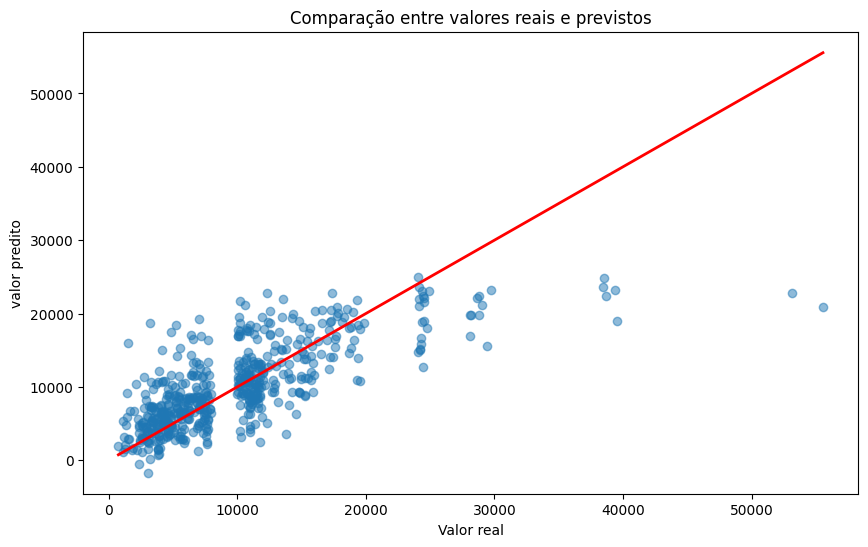

In [ ]:
#creating a graphic
plt.figure(figsize=(10,6)) #size of the graphic
plt.scatter(y_test, y_pred, alpha = 0.5) # the dispersion, and alpha the transparency
plt.xlabel('Valor real')
plt.ylabel('valor predito')
plt.title('Comparação entre valores reais e previstos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color ='red', linewidth=2) #creat the line
plt.show()

In [ ]:
#creat a variable with the X_train columns in it
nomes_atributos = X_train.columns
nomes_atributos

Index(['IDADE', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul', 'NOVO_NIVEL_Pessoa Gestora', 'NOVO_NIVEL_Pleno',
       'NOVO_NIVEL_Sênior'],
      dtype='object')

In [ ]:
#create a table with the model coefficients, then creats a column named "coeficientes", and creates the index with the name of "nomes_atributos"
coefs = pd.DataFrame(model.coef_, columns =['coeficientes'], index=nomes_atributos)

In [ ]:
#sort the table, in this case, in descending order
coefs = coefs.sort_values(by='coeficientes', ascending=False)

Text(0.5, 1.0, 'Coeficientes da regressão linear')

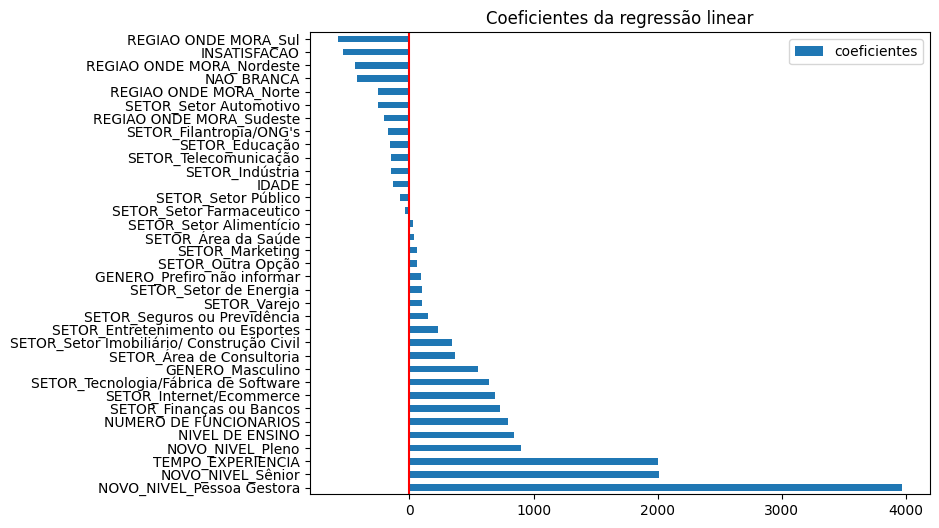

In [ ]:
coefs.plot.barh(figsize =(8,6)) #creats a horizontal bar
plt.axvline(x=0, color='red') #creats a vertical line
plt.title('Coeficientes da regressão linear')